In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels 

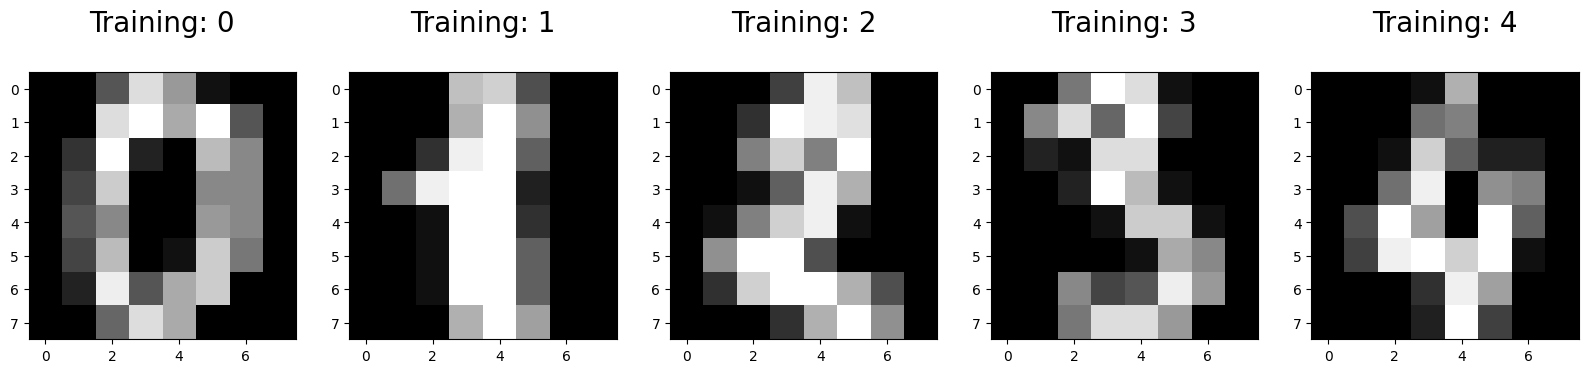

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [5]:
# 2 batch gradient descent (GD) for Logistic regression

def LogisticRegression_GD(X_train, y_train, learning_rate):
    #TODO
    n_samples, n_features = X_train.shape
    n_classes = np.unique(y_train).size

    # Initialize weights and biases
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))

    # Regularization parameter
    lambda_ = 0.1

    # One-hot encode the labels
    Y_one_hot = np.zeros((n_samples, n_classes))
    Y_one_hot[np.arange(n_samples), y_train] = 1

    # To record the loss at each iteration
    losses = []

    # Gradient descent loop
    epsilon = 1e-4  # Convergence threshold
    max_iter = 10000  # Maximum number of iterations to prevent infinite loop
    for iteration in range(max_iter):
        # Compute the linear combination
        z = np.dot(X_train, W) + b  # Shape: (n_samples, n_classes)

        # Numerical stability trick: subtract max z for each sample
        z_max = np.max(z, axis=1, keepdims=True)
        z_stable = z - z_max

        # Compute softmax probabilities
        exp_z = np.exp(z_stable)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

        # Compute the F(w)
        regularization_term = (lambda_ / 2) * np.linalg.norm(W, ord='fro') ** 2
        Fw = -np.sum(Y_one_hot * np.log(softmax_scores)) / n_samples + regularization_term
        losses.append(Fw)

        # Check for convergence
        if iteration > 0 and abs(losses[-1] - losses[-2]) <= epsilon:
            print(f"Converged at iteration {iteration}")
            print("the value of F(w) is (The loss is)", Fw)
            break

        # Compute the gradient
        gradient_W = (1 / n_samples) * np.dot(X_train.T, (softmax_scores - Y_one_hot)) + lambda_ * W
        gradient_b = (1 / n_samples) * np.sum(softmax_scores - Y_one_hot, axis=0, keepdims=True)

        # Update weights and biases
        W -= learning_rate * gradient_W
        b -= learning_rate * gradient_b

    return W, b, losses

---------------------------------------
learning rate = 0.05
Converged at iteration 130
the value of F(w) is (The loss is) 0.22029120331074445
Training accuracy = 0.9799554565701559
test precision = 0.9622222222222222
---------------------------------------
learning rate = 0.005
Converged at iteration 345
the value of F(w) is (The loss is) 0.1898597330586415
Training accuracy = 0.9747587230883444
test precision = 0.9644444444444444
---------------------------------------
learning rate = 0.01
Converged at iteration 239
the value of F(w) is (The loss is) 0.18031309420973185
Training accuracy = 0.9769858945805494
test precision = 0.9666666666666667


Text(0, 0.5, 'loss')

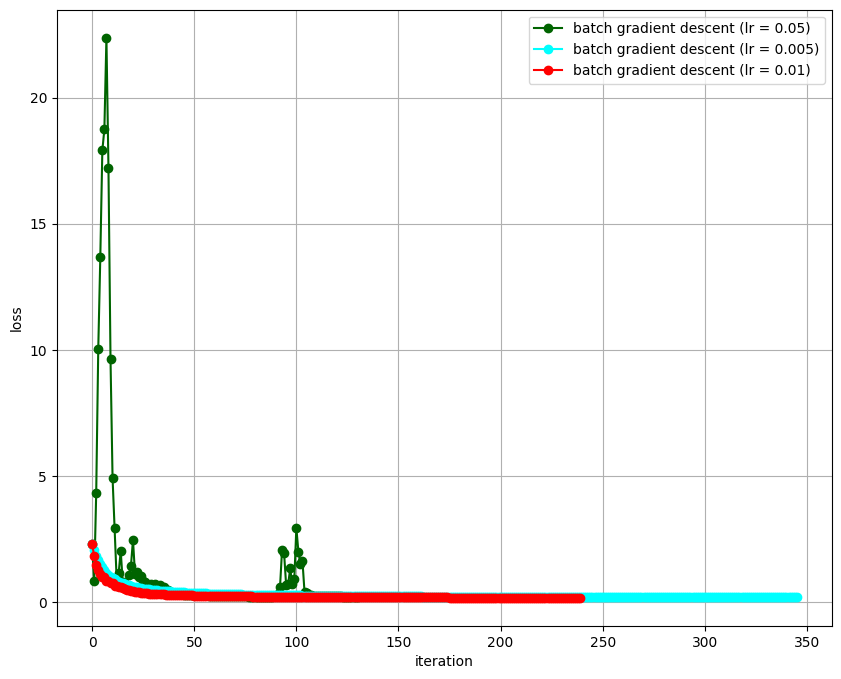

In [6]:
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):

    print ('---------------------------------------')
    print ('learning rate =', learning_rate[i])

    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])

    #TODO
    # Define the predict function
    def predict(X, W, b):
      # Compute logits
      z = np.dot(X, W) + b
      z_max = np.max(z, axis=1, keepdims=True)
      z_stable = z - z_max  # Apply the stability trick

      # Compute softmax probabilities
      exp_z = np.exp(z_stable)
      softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

      # Take the class with the highest probability
      predictions = np.argmax(softmax_scores, axis=1)
      return predictions

    y_train_pred = predict(X_train, W, b)
    prec_train = np.mean(y_train_pred == y_train)
    print('Training accuracy =', prec_train)

    #TODO
    y_test_pred = predict(X_test, W, b)
    prec_test = np.mean(y_test_pred == y_test)
    print ('test precision =', prec_test)

    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [9]:
# 4 stochastic gradient descent (SGD) for Logistic regression

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):

    #TODO: initialization
    n_samples, n_features = X.shape
    n_classes = np.unique(y).size  # Number of classes

    # Initialize weights and biases
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))

    # Regularization parameter
    lambda_ = eta

    notstop = True
    epoch = 0
    loss = []

    # optimization loop
    while notstop and epoch < max_epoch:
        #TODO: SGD of each epoch

        # Shuffle the data at the beginning of each epoch
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # One-hot encode the labels
        Y_one_hot = np.zeros((n_samples, n_classes))
        Y_one_hot[np.arange(n_samples), y_shuffled] = 1

        # Iterate over mini-batches
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = Y_one_hot[i:i + batch_size]

            # Forward pass: compute logits
            z = np.dot(X_batch, W) + b  # Shape: (batch_size, n_classes)
            z_max = np.max(z, axis=1, keepdims=True)
            z_stable = z - z_max

            # Compute softmax probabilities
            exp_z = np.exp(z_stable)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

            # Compute gradients
            gradient_W = (1 / batch_size) * np.dot(X_batch.T, (softmax_scores - y_batch)) + lambda_ * W
            gradient_b = (1 / batch_size) * np.sum(softmax_scores - y_batch, axis=0, keepdims=True)

            # Update weights and biases
            W -= lr * gradient_W
            b -= lr * gradient_b

        # After each epoch, compute the loss over the entire dataset
        z = np.dot(X, W) + b
        z_max = np.max(z, axis=1, keepdims=True)
        z_stable = z - z_max
        exp_z = np.exp(z_stable)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

        # One-hot encode the labels (if not already)
        Y_one_hot = np.zeros((n_samples, n_classes))
        Y_one_hot[np.arange(n_samples), y] = 1

        # Compute the loss function F(w)
        regularization_term = (lambda_ / 2) * np.linalg.norm(W, ord='fro') ** 2
        Fw = -np.sum(Y_one_hot * np.log(softmax_scores)) / n_samples + regularization_term
        loss.append(Fw)


        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print('reduce learning rate to', lr)

        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:
                notstop = False
                print("the final value of F(w) is (The loss is)", Fw)
                break

        epoch += 1

    #TODO: W and b
    return (W, b, loss)

---------------------------------------
batch_size = 10
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
the final value of F(w) is (The loss is) 0.23154775060510377
training precision = 0.9851521900519673
test precision = 0.9711111111111111
---------------------------------------
batch_size = 50
reduce learning rate to 0.005
reduce learning rate to 0.0025
the final value of F(w) is (The loss is) 0.2321083012417241
training precision = 0.9821826280623608
test precision = 0.9688888888888889
---------------------------------------
batch_size = 100
reduce learning rate to 0.005
the final value of F(w) is (The loss is) 0.23264772749556129
training precision = 0.9836674090571641
test precision = 0.9711111111111111


Text(0, 0.5, 'loss')

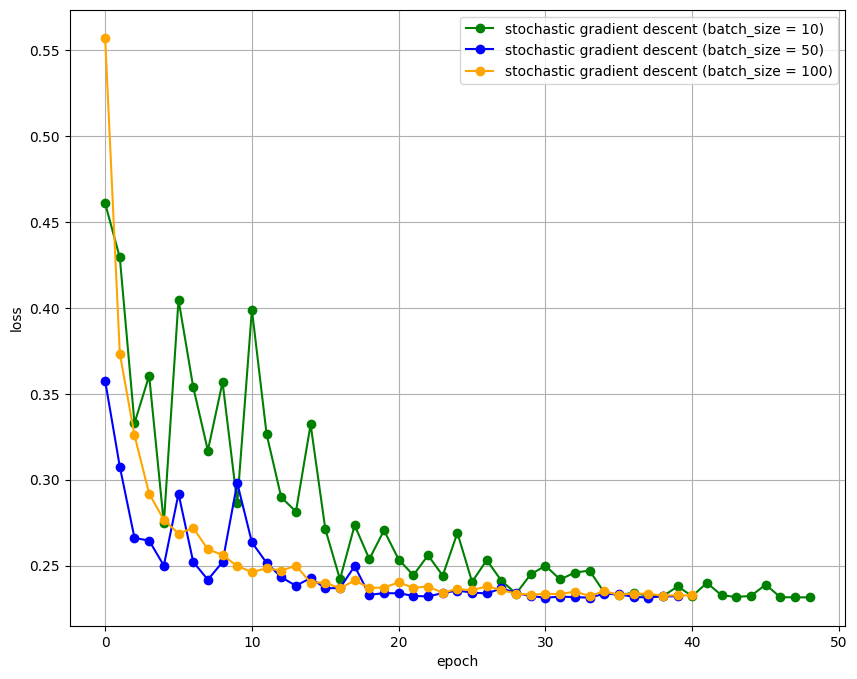

In [13]:
# 4 Continue
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: same learning rate(0.01)for different batch size
lr = [0.01,0.01,0.01]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):

    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)

    #TODO
    # Predict function (assuming it's already defined as in previous code)
    def predict(X, W, b):
        # Compute logits
        z = np.dot(X, W) + b
        z_max = np.max(z, axis=1, keepdims=True)
        z_stable = z - z_max  # Apply the stability trick

        # Compute softmax probabilities
        exp_z = np.exp(z_stable)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

        # Take the class with the highest probability
        predictions = np.argmax(softmax_scores, axis=1)
        return predictions

    # Compute training precision
    y_train_pred = predict(X_train, W, b)
    prec_train = np.mean(y_train_pred == y_train)
    print('training precision =', prec_train)

    #TODO
    # Compute test precision
    y_test_pred = predict(X_test, W, b)
    prec_test = np.mean(y_test_pred == y_test)
    print('test precision =', prec_test)

    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

---------------------------------------
batch_size = 10
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
the final value of F(w) is (The loss is) 0.23407122883864187
training precision = 0.9821826280623608
test precision = 0.9622222222222222
---------------------------------------
batch_size = 50
reduce learning rate to 0.025
reduce learning rate to 0.0125
reduce learning rate to 0.00625
reduce learning rate to 0.003125
the final value of F(w) is (The loss is) 0.2318914954048645
training precision = 0.9851521900519673
test precision = 0.9733333333333334
---------------------------------------
batch_size = 100
reduce learning rate to 0.05
reduce learning rate to 0.025
reduce learning rate to 0.0125
the final value of F(w) is (The loss is) 0.23832117902983352
training precision = 0.9836674090571641
test precision = 0.9644444444444444


Text(0, 0.5, 'loss')

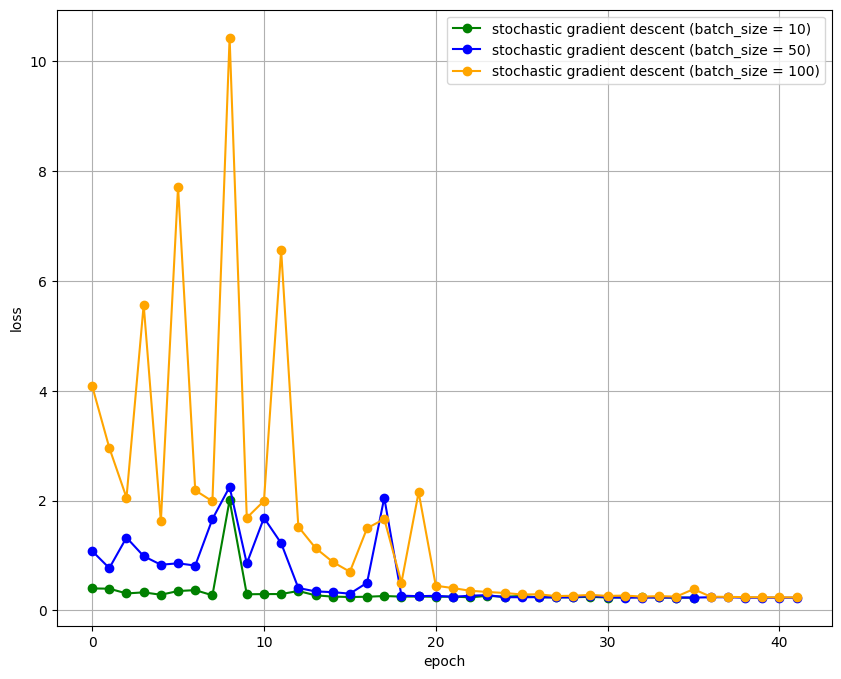

In [12]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [0.01,0.05,0.1]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):

    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)

    #TODO
    # Predict function (assuming it's already defined as in previous code)
    def predict(X, W, b):
        # Compute logits
        z = np.dot(X, W) + b
        z_max = np.max(z, axis=1, keepdims=True)
        z_stable = z - z_max  # Apply the stability trick

        # Compute softmax probabilities
        exp_z = np.exp(z_stable)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

        # Take the class with the highest probability
        predictions = np.argmax(softmax_scores, axis=1)
        return predictions

    # Compute training precision
    y_train_pred = predict(X_train, W, b)
    prec_train = np.mean(y_train_pred == y_train)
    print('training precision =', prec_train)

    #TODO
    # Compute test precision
    y_test_pred = predict(X_test, W, b)
    prec_test = np.mean(y_test_pred == y_test)
    print('test precision =', prec_test)

    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')